In [7]:
# Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) 
# and build fit a model to it.
import tensorflow as tf
import pandas as pd

diabetes_dataset = pd.read_csv("/Users/daviedev/Downloads/diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Info on the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Info
 # Perfect no missing values
 # int64 and float64
# Using the features to predict the Outcome column

In [10]:
# Create X and y values (features and labels)
X = diabetes_dataset.drop("Outcome", axis=1)
y = diabetes_dataset["Outcome"]

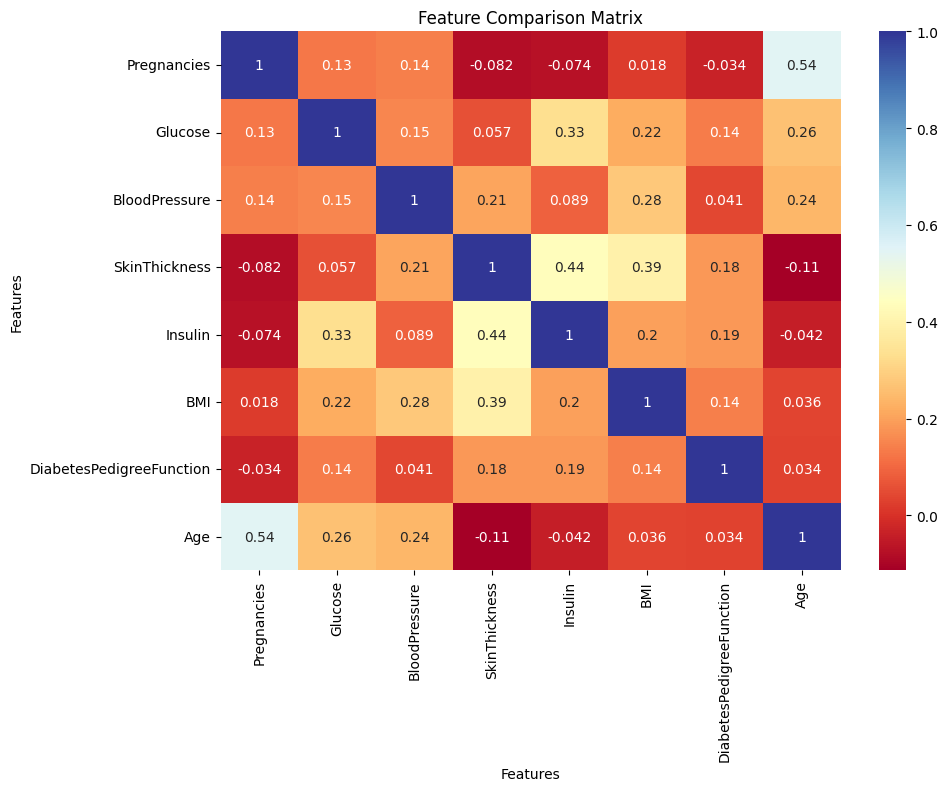

In [16]:
# Matrix Feature 
matrix = X.corr()
matrix

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='RdYlBu')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Comparison Matrix')

# Show the heatmap
plt.show()

In [13]:
# Create training sets and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(768, 614, 154)

In [14]:
len(y), len(y_train), len(y_test)

(768, 614, 154)

In [19]:
# Fit it to a Nueral Network Model

# Set the seed
tf.random.set_seed(42)

# Build Model
diabetes_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile Model
diabetes_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# Fit the Model
diabetes_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 45.4009 - mae: 45.4009
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 39.4111 - mae: 39.4111
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 33.4974 - mae: 33.4974
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 27.8469 - mae: 27.8469
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 22.1690 - mae: 22.1690
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 16.5515 - mae: 16.5515
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 10.8609 - mae: 10.8609
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 5.0745 - mae: 5.0745
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1043 - mae: 1.1043
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7308 - mae: 0.7308
Epoch 11/100
20/20 [=========================

In [21]:
# Evaluate the model
diabetes_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4015 - mae: 0.4015


[0.4014558792114258, 0.4014558792114258]

In [23]:
# Normalization of the data 
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<AxesSubplot: ylabel='Frequency'>

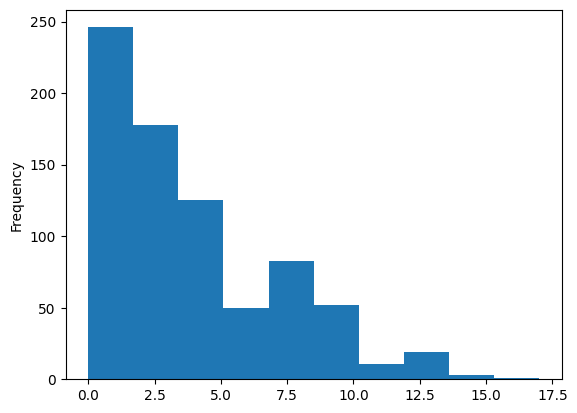

In [24]:
X["Pregnancies"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

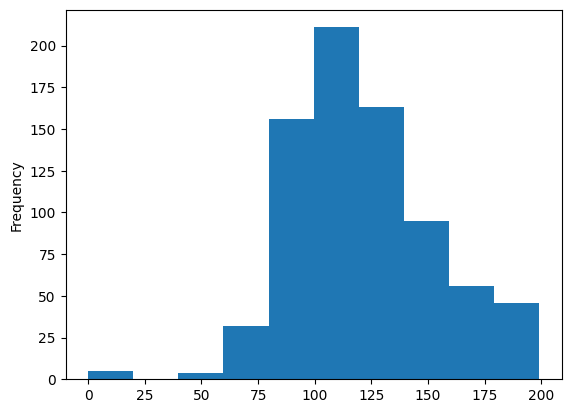

In [25]:
X["Glucose"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

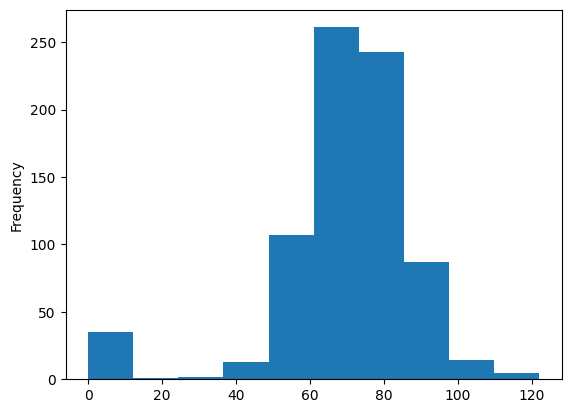

In [26]:
X["BloodPressure"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

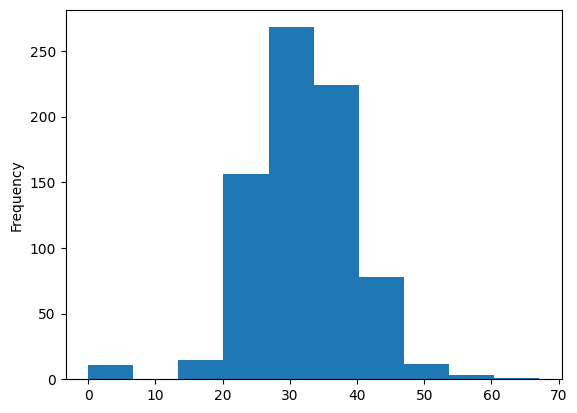

In [27]:
X["BMI"].plot(kind="hist")

### Prepare the data using the Scikit-Learn library

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
# These are the feature columns
ct = make_column_transformer(
    (MinMaxScaler(), ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]), # turn all these values into 0 and 1
)

# Create X and y values (features and labels)
X = diabetes_dataset.drop("Outcome", axis=1)
y = diabetes_dataset["Outcome"]

# Model to learn from Train Data and Evaluate it on Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [30]:
# WHAT does the data look like 
X_train.loc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Name: 0, dtype: float64

In [31]:
X_train_normal[0]

array([0.11764706, 0.42211055, 0.        , 0.        , 0.        ,
       0.        , 0.09649872, 0.        ])

In [32]:
# Shape of the data
X_train_normal.shape, X_train.shape

((614, 8), (614, 8))

In [40]:
# Set seed
tf.random.set_seed(42)


# Build the model
diabetes_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
diabetes_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

# Fit the model
history = diabetes_model_2.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 6ms/step - loss: 0.3546 - mae: 0.3546
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3493 - mae: 0.3493
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3486 - mae: 0.3486
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3510 - mae: 0.3510
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3491 - mae: 0.3491
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3491 - mae: 0.3491
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3483 - mae: 0.3483
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3492 - mae: 0.3492
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3496 - mae: 0.3496
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3485 - mae: 0.3485
Epoch 11/100
20/20 [==============================] - 0s 4m

In [41]:
# Evaluate the model on the test data
test_loss, test_mae = diabetes_model_2.evaluate(tf.expand_dims(X_test_normal, axis=-1), y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

5/5 [==============================] - 0s 3ms/step - loss: 0.3589 - mae: 0.3589
Test Loss: 0.3588944971561432
Test MAE: 0.3588944971561432


In [42]:
diabetes_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8, 100)            200       
                                                                 
 dense_10 (Dense)            (None, 8, 10)             1010      
                                                                 
 dense_11 (Dense)            (None, 8, 1)              11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
